In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup   
import chromedriver_autoinstaller
import time
import math

In [ ]:

#############################################################################################
## 기본 변수 설정
query_txt = "대학생 노트북 추천"
cnt = 50
page_cnt = math.ceil(cnt / 30)  # 크롤링 할 페이지 수 
f_name = "./blog.txt"

## 크롬 드라이버 기본 자동 설치
## driver 객체 생성
chromedriver_autoinstaller.install()
driver = webdriver.Chrome()

## 링크 얻기
driver.get('http://www.naver.com')

## sleep은 반강제 -> 타임 지연을 안시키면 
## 드라이버가 요소를 못 찾는 NoSuchElementError가 가장 많이 발생
time.sleep(2)

## 주소창 찾아서 
element = driver.find_element(By.ID, 'query')
## 텍스트 보내고 엔터
element.send_keys(query_txt)
element.send_keys("\n")

## 실행 안되도 당황하지 말고 다시 한 번 더
## 가끔 요소를 찾지 못한다며 오류 뜰 수 있습니다
## 블로그 클릭 
driver.find_element(By.LINK_TEXT,'블로그').click( )

no = 1
# 자동 스크롤다운 함수 -> 안에 큰 따옴표가 자바스크립트: 몰라도 됩니다 -> 따와서 사용했습니다
def scroll_down(driver):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    time.sleep(3)
i = 1
while (i <= page_cnt):
      scroll_down(driver) 
      i += 1

########################################################################################
## 저장할 리스트 기본 설정
username_list, title_list, content_list = [], [], []

## 페이지 소스를 얻어서 파싱 -> 하나의 구문 
## 결과적으로 soup을 만들면 이 소스에서 내가 원하는 정보를 찾을 수 있음
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

## view list를 찾아서 저장 
## 일단 변수인데 변수에 html이 그대로 저장됨
view_list = soup.find("ul", "lst_view _fe_view_infinite_scroll_append_target")     

In [2]:
## 길이가 129
len(view_list)

129

In [3]:
## 출력
view_list

<ul class="lst_view _fe_view_infinite_scroll_append_target"> <li class="bx"> <div class="view_wrap"> <div class="user_box"> <div class="api_save_group _keep_wrap"> <a aria-pressed="false" class="btn_save _keep_trigger" data-url="https://blog.naver.com/mobano/223452497216" href="#" onclick="tCR('a=blg*f.kep&amp;r=1&amp;i=90000003_000000000000003406CE8540&amp;u=javascript'); return false;" role="button"><i class="spnew ico_save">문서 저장하기</i></a> <div class="api_ly_save _keep_save_layer"> <a class="spnew_af item item_save _keep_save" data-cr-off="a=blg*f.kepoff&amp;r=1&amp;i=90000003_000000000000003406CE8540&amp;u=javascript" data-cr-on="a=blg*f.kepon&amp;r=1&amp;i=90000003_000000000000003406CE8540&amp;u=javascript" href="#" role="button">Keep에 저장</a> <a class="spnew_af item item_quick" href="https://keep.naver.com/" onclick="return goOtherCR(this,'a=blg*f.kephome&amp;r=1&amp;i=90000003_000000000000003406CE8540&amp;u='+urlencode(this.href));" target="_blank">Keep 바로가기</a> </div> </div> <di

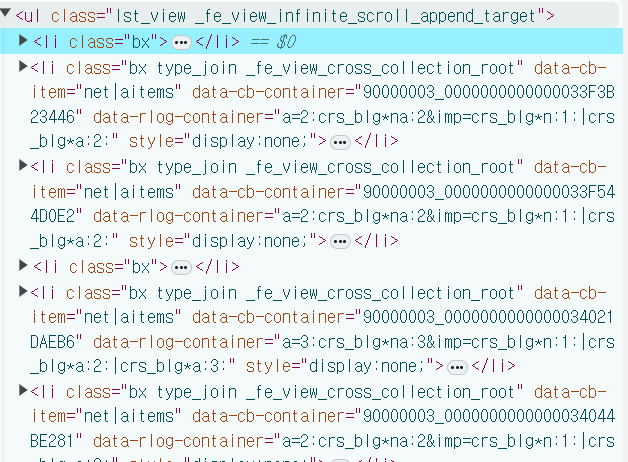

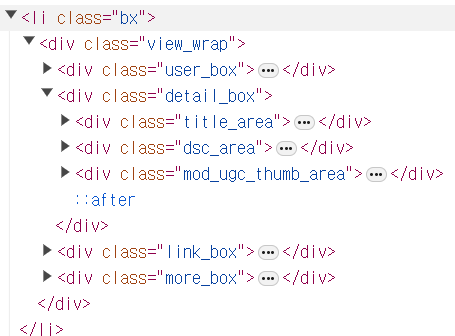

In [ ]:
## view list 안에 li가 여러가지 있음 
## 이 중에 li class='bx'안에서 블로거 이름, 제목, 간략한 내용 따오기
for i in view_list:
    ## 예외처리 
    ## 만약 안하면 class="bx type_join _fe_view_cross_collection_root"와 같은 이상한 것도 찾게 됨
    try:
        ## view_wrap를 찾을 수 있으면
        contents = i.find('div','view_wrap').find_all('div')
    except :
        ## 아니면 넘어가고
        continue
    else :
        ## 이걸 실행하라
        ## 블로그 주인 닉네임 추출
        username = i.find('div','user_info').find('a').get_text()
        username_list.append(username)

        ## 게시글 제목
        title= i.find('div','title_area').find('a').get_text()
        title_list.append(title)

        ## 게시글 내용
        content = i.find('div','dsc_area').get_text()         
        content_list.append(content)
        
        no += 1
        if no > cnt :
            break

    time.sleep(0.5)    